In [2]:
import geopandas as gpd 

In [6]:
bounds = gpd.read_file('data/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp')

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 states provinces,3,ARG-1309,1309,AR-E,None,AR,1,Entre Ríos,Entre-Rios,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-58.20011 -32.44713, -58.20012 -32.4..."
1,Admin-1 states provinces,6,URY-8,8,UY-PA,None,UY,1,Paysandú,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-58.20012 -32.44720, -58.20011 -32.4..."
2,Admin-1 states provinces,2,IDN-1185,1185,ID-KI,None,ID,5,Kalimantan Timur,Kaltim,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
3,Admin-1 states provinces,6,MYS-1186,1186,MY-12,None,MY,5,Sabah,North Borneo,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
4,Admin-1 states provinces,3,CHL-2694,2694,CL-AP,None,CL,1,Arica y Parinacota,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5..."


<AxesSubplot: >

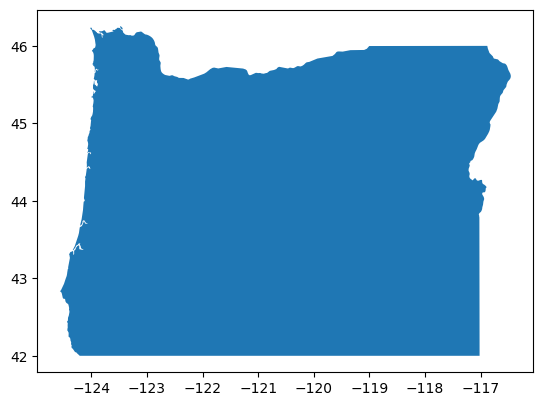

In [9]:
oregon = bounds[bounds['name'] == 'Oregon']
oregon.head()
oregon.plot()


In [19]:
oregon.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
#add lookouts to map 
fire_lookouts_points = gpd.read_file('data/fire_lookouts.csv')

<AxesSubplot: >

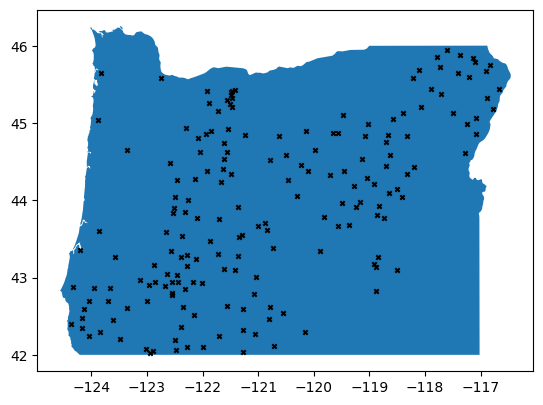

In [40]:
from shapely.geometry import Point

fire_lookouts = gpd.GeoDataFrame(fire_lookouts_points, geometry=[Point(xy) for xy in zip(fire_lookouts_points['X'], fire_lookouts_points['Y'])])
fire_lookouts.crs = "EPSG:4326"

ax = oregon.plot()

# Plot the points
fire_lookouts.plot(ax=ax, marker ='x', color='black', markersize=10)
